This notebook provide an example/test of my method to create time-distance plots using a sequence of sunpy maps and a rectangular box.  

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sunpy.map
import numpy as np
import astropy.units as u
from astropy.coordinates import Angle

My script time_distance.py is in the same directory as this notebook.

In [2]:
import time_distance
from time_distance import Rectangle

### Load some AIA data

In [3]:
files = glob.glob("..\\..\\..\\data\\AIA\\20250326_cutouts\\*304_.fts")
len(files)

280

In [4]:
map_seq = sunpy.map.Map(files, sequence=True)

Select one map where the jet is well visible

In [5]:
aia_map = sunpy.map.Map(files[120])

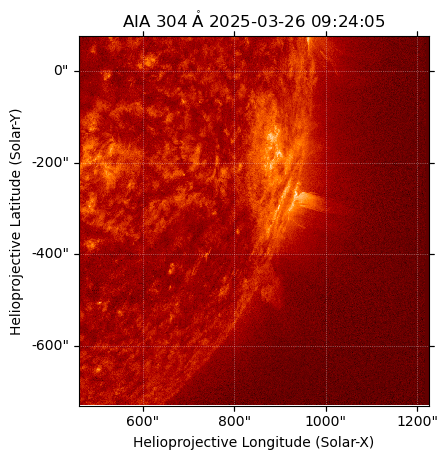

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
image = aia_map.plot(axes=ax)

plt.show()

### Choose a box and plot it

In [7]:
rectangle_center = [995*u.arcsec,-290*u.arcsec]  ## in arcsec
rectangle_width = 30*u.arcsec          ## in arcsec
rectangle_length = 120*u.arcsec        ## in arcsec
rectangle_angle = Angle(-15, u.degree)          ## in degrees

In [8]:
box = Rectangle(rectangle_center, rectangle_length, rectangle_width, rectangle_angle)

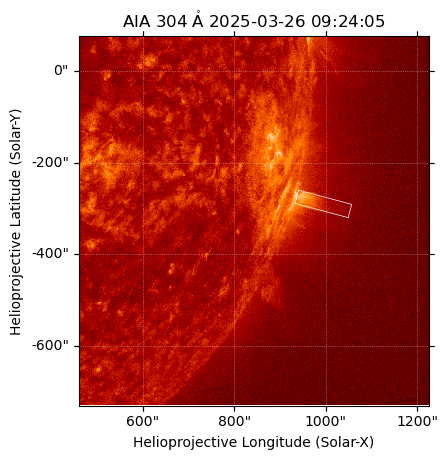

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
image = aia_map.plot(axes=ax)
box.plot(ax=ax)
plt.show()

### Produce time-distance array, and plot it

Calculation of the time-distance array is a bit slow - patience! It also displays a lot of warnings from sunpy - I should get rid of this at some point

In [10]:
res = box.get_time_distance_array(map_seq)

Time-distance plot

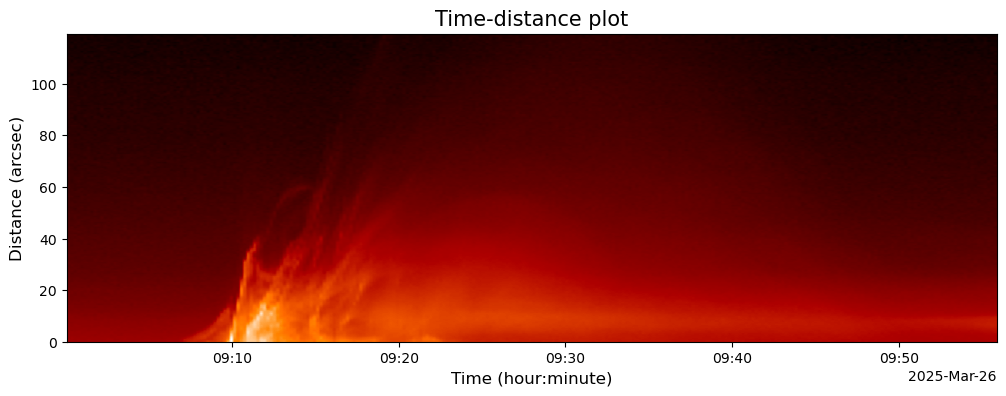

In [11]:
fig = plt.figure(dpi=100, figsize = (12, 4))
ax = fig.subplots(1, 1)

x_lims = mdates.date2num(res['time'])
y_lims = res['distance'].value

ax.imshow(np.log(res['time-distance']), origin="lower", cmap='sdoaia304', 
          extent = [x_lims[0], x_lims[-1],  y_lims[0], y_lims[-1]], 
          aspect='auto')

ax.set_title('Time-distance plot', fontsize = 15)
ax.set_xlabel('Time (hour:minute)', fontsize = 12)
ax.set_ylabel('Distance (arcsec)', fontsize = 12)

ax.xaxis_date()

locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.show()